In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

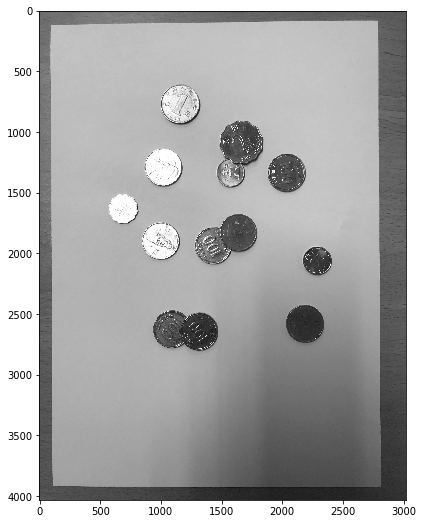

In [77]:
image = '/home/khan/cv/Image0/coins_set3.jpg'
img = cv2.imread(image, 1)
img_orig = img.copy()
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(img,cmap='gray')

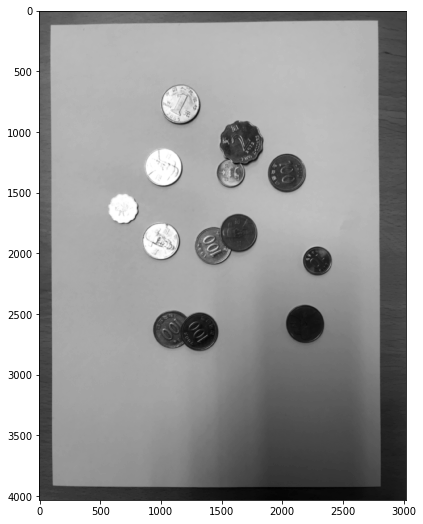

In [78]:
img =  cv2.GaussianBlur(img, (221,221), cv2.BORDER_DEFAULT)
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(img,cmap='gray')

In [84]:
all_circs = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 0.9, 150, param1 = 50, param2 = 30, minRadius = 50, maxRadius = 180)
all_circs_rounded = np.uint16(np.around(all_circs))

print(all_circs_rounded)
print(all_circs_rounded.shape)
print('I have found ' + str(all_circs_rounded.shape[1]) + ' coins.')


[[[1004 1902  146]
  [2296 2068  120]
  [1580 1344  118]
  [1166  778  165]
  [2192 2584  157]
  [2042 1340  158]
  [1020 1290  153]
  [1322 2648  157]
  [1442 1946  148]
  [1640 1836  158]
  [1100 2628  158]
  [1680 1102  172]]]
(1, 12, 3)
I have found 12 coins.


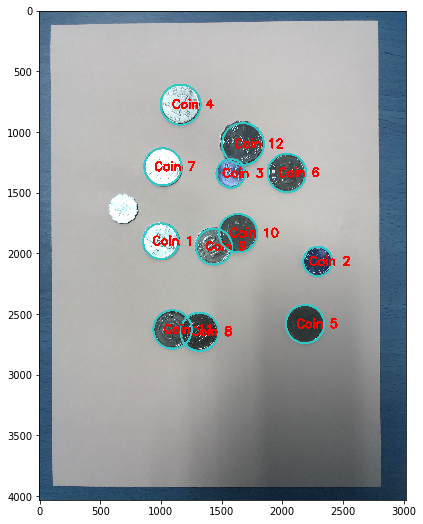

In [80]:
count = 1
for i in all_circs_rounded[0, :]:
    cv2.circle(img_orig, (i[0],i[1]),i[2],(50, 200, 200), 15)
    cv2.circle(img_orig, (i[0],i[1]),2,(255, 0, 0), 5)
    cv2.putText(img_orig, "Coin " + str(count), (i[0]-70,i[1]+30), cv2.FONT_HERSHEY_SIMPLEX, 3.3, (255,0,0), 15)
    count += 1
    
    plt.rcParams["figure.figsize"] = (16,9)
    plt.imshow(img_orig)